# Q1

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [7]:
x = df.drop(columns = ['target'], axis = 1)
y = df['target']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [9]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [10]:
model1 = LogisticRegression(penalty = 'l1', solver = 'liblinear') #lasso
model2 = LogisticRegression(penalty = 'l2') #ridge
model3 = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio = 0.5)
#L1 + L2 hybrid, l1_ratio = 0 -> L1(lasso) = 0%
#L1 + L2 hybrid, l1_ratio = 0.5 -> L1(lasso) = 50%, L2(ridge) = 50%
#L1 + L2 hybrid, l1_ratio = 1 -> L1(lasso) = 100%

#L2 (Ridge) = Gentle penalty (shrinks all features a bit)
#L1 (Lasso) = Aggressive penalty (eliminates weak features)
#ElasticNet = Balanced penalty (both shrinking and elimination)

In [11]:
model1.fit(x_train_scaled, y_train) #l1 only takes liblinear solver
model2.fit(x_train_scaled, y_train)
model3.fit(x_train_scaled, y_train) #elasticnet only takes saga solver and l1_ratio must be declared

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [12]:
y1_pred = model1.predict(x_test_scaled)
y2_pred = model2.predict(x_test_scaled)
y3_pred = model3.predict(x_test_scaled)

In [13]:
test_acc1 = accuracy_score(y_test, y1_pred)
train_acc1 = accuracy_score(y_train, model1.predict(x_train_scaled))
test_acc2 = accuracy_score(y_test, y2_pred)
train_acc2 = accuracy_score(y_train, model2.predict(x_train_scaled))
test_acc3 = accuracy_score(y_test, y3_pred)
train_acc3 = accuracy_score(y_train, model3.predict(x_train_scaled))
train_accuracies = [train_acc1, train_acc2, train_acc3]
test_accuracies = [test_acc1, test_acc2, test_acc3]


In [14]:
print(f"Train Accuracy Model L1: {train_acc1:.2f}, Test Accuracy Model L1: {test_acc1:.2f}")
print(f"L1 slope: {model1.coef_} \n L1 intercept :  {model1.intercept_}\n")
print(f"Train Accuracy Model L2: {train_acc2:.2f}, Test Accuracy Model L2: {test_acc2:.2f}")
print(f"L2 slope: {model2.coef_} \n L2 intercept :  {model2.intercept_}\n")
print(f"Train Accuracy Model Elastic Net: {train_acc3:.2f}, Test Accuracy Model Elastic Net: {test_acc3:.2f}")
print(f"elastic net slope: {model3.coef_} \n elastic net intercept :  {model3.intercept_}\n")


Train Accuracy Model L1: 0.87, Test Accuracy Model L1: 0.80
L1 slope: [[ 0.         -0.82542718  0.87650578 -0.31342309 -0.43962479 -0.05120635
   0.13148026  0.64753078 -0.41193252 -0.75981219  0.33520868 -0.84027634
  -0.64777057]] 
 L1 intercept :  [-0.11235471]

Train Accuracy Model L2: 0.87, Test Accuracy Model L2: 0.80
L2 slope: [[-0.00673443 -0.83566545  0.88583501 -0.32005334 -0.44727634 -0.06268543
   0.14080389  0.65282635 -0.42023491 -0.7654063   0.34360461 -0.84752165
  -0.65685634]] 
 L2 intercept :  [-0.12874356]

Train Accuracy Model Elastic Net: 0.87, Test Accuracy Model Elastic Net: 0.80
elastic net slope: [[-0.00189836 -0.83002284  0.88219218 -0.31702371 -0.44402533 -0.05739974
   0.13645524  0.65179567 -0.4162231  -0.76397119  0.33930916 -0.84501878
  -0.65309429]] 
 elastic net intercept :  [-0.12709785]



In [15]:
#small gap between train and test accuracy indicates good fit. Model generalizes well

import matplotlib.pyplot as plt

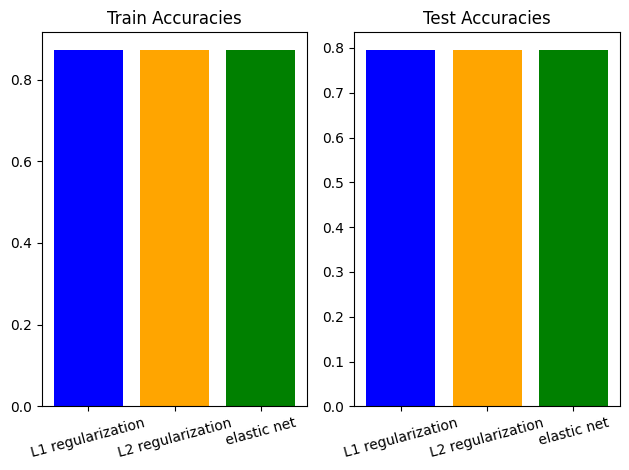

In [16]:
plt.subplot(1, 2, 1)
plt.bar(['L1 regularization', 'L2 regularization', 'elastic net'], train_accuracies, color = ['blue', 'orange', 'green'])
plt.title('Train Accuracies')
plt.xticks(rotation = 15)
plt.subplot(1, 2, 2)
plt.bar(['L1 regularization', 'L2 regularization', 'elastic net'], test_accuracies, color = ['blue', 'orange', 'green'])
plt.title('Test Accuracies')
plt.tight_layout()
plt.xticks(rotation = 15)
plt.show()

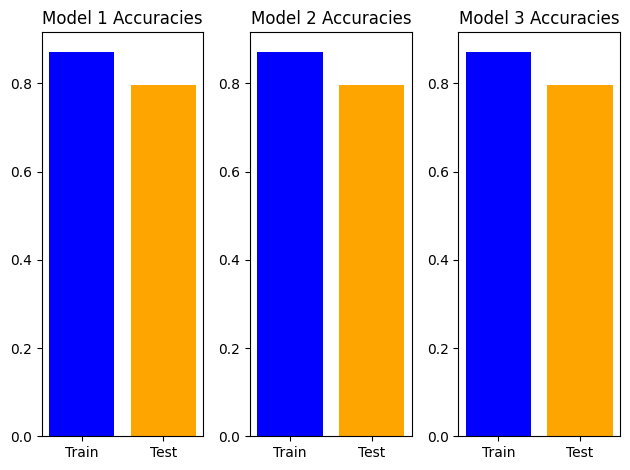

In [17]:
plt.subplot(1,3,1)
plt.bar(['Train', 'Test'], [train_acc1, test_acc1], color = ['blue', 'orange'])
plt.title('Model 1 Accuracies')
plt.subplot(1,3,2)
plt.bar(['Train', 'Test'], [train_acc2, test_acc2], color = ['blue', 'orange'])
plt.title('Model 2 Accuracies')
plt.subplot(1,3,3)
plt.bar(['Train', 'Test'], [train_acc3, test_acc3], color = ['blue', 'orange'])
plt.title('Model 3 Accuracies')
plt.tight_layout()
plt.show()

# Q2

In [18]:
from sklearn.datasets import load_iris

In [19]:
iris = load_iris()

In [20]:
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['target'] = iris.target


In [21]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [22]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [23]:
MLR1 = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
MLR2 = LogisticRegression(multi_class = 'multinomial', solver = 'liblinear')
MLR3 = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')
MLR4 = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cholesky')
MLR5 = LogisticRegression(multi_class = 'multinomial', solver = 'sag')
MLR6 = LogisticRegression(multi_class = 'multinomial', solver = 'saga')

In [24]:
df.shape

(150, 5)

In [25]:
x = df.drop(columns = ['target'], axis = 1)
y = df['target']

In [26]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

In [29]:
MLRScaler = StandardScaler()
x_train_scaled = MLRScaler.fit_transform(x_train)
x_test_scaled = MLRScaler.transform(x_test)

In [30]:
MLR1.fit(x_train_scaled, y_train)
#MLR2.fit(x_train_scaled, y_train) liblinear solver does not support multinomial
MLR3.fit(x_train_scaled, y_train)
# MLR4.fit(x_train_scaled, y_train) newton-cholesky solver may not be available in some versions
MLR5.fit(x_train_scaled, y_train)
MLR6.fit(x_train_scaled, y_train)

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib

LogisticRegression(multi_class='multinomial', solver='saga')

In [31]:
lbfgs_pred = MLR1.predict(x_test_scaled)
newtoncg_pred = MLR3.predict(x_test_scaled)
sag_pred = MLR5.predict(x_test_scaled)
saga_pred = MLR6.predict(x_test_scaled)

In [32]:
results = []
solvers = ['lbfgs', 'newton-cg', 'sag', 'saga']
predictions = [lbfgs_pred, newtoncg_pred, sag_pred, saga_pred]
training_acc1 = accuracy_score(y_train, MLR1.predict(x_train_scaled))
training_acc3 = accuracy_score(y_train, MLR3.predict(x_train_scaled))
training_acc5 = accuracy_score(y_train, MLR5.predict(x_train_scaled))
training_acc6 = accuracy_score(y_train, MLR6.predict(x_train_scaled))
training_accs = [training_acc1, training_acc3, training_acc5, training_acc6]
for i in range(len(solvers)):
    results.append({
        'Solver': solvers[i],
        'Training Accuracy':training_accs[i],
        'Testing Accuracy':accuracy_score(y_test, predictions[i])
    })


In [33]:
results

[{'Solver': 'lbfgs',
  'Training Accuracy': 0.9666666666666667,
  'Testing Accuracy': 1.0},
 {'Solver': 'newton-cg',
  'Training Accuracy': 0.9666666666666667,
  'Testing Accuracy': 1.0},
 {'Solver': 'sag',
  'Training Accuracy': 0.9666666666666667,
  'Testing Accuracy': 1.0},
 {'Solver': 'saga',
  'Training Accuracy': 0.9666666666666667,
  'Testing Accuracy': 1.0}]

In [34]:
results = pd.DataFrame(results)

In [35]:
results

,Solver,Training Accuracy,Testing Accuracy
0,lbfgs,0.966667,1.0
1,newton-cg,0.966667,1.0
2,sag,0.966667,1.0
3,saga,0.966667,1.0


In [36]:
df1 = pd.read_csv('heart.csv')

In [37]:
x = df1.drop(columns = ['target'], axis = 1)
y = df1['target']

In [38]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [39]:
df1.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [40]:
heartScaler = StandardScaler()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42)


In [41]:
x_train_scaled = heartScaler.fit_transform(x_train)
x_test_scaled = heartScaler.transform(x_test)

In [42]:
MLR1 = LogisticRegression( solver = 'lbfgs')
MLR2 = LogisticRegression( solver = 'liblinear')
MLR3 = LogisticRegression( solver = 'newton-cg')
MLR4 = LogisticRegression( solver = 'newton-cholesky')
MLR5 = LogisticRegression( solver = 'sag')
MLR6 = LogisticRegression( solver = 'saga')

MLR1.fit(x_train_scaled, y_train)
MLR2.fit(x_train_scaled, y_train) 
MLR3.fit(x_train_scaled, y_train)
MLR4.fit(x_train_scaled, y_train)
MLR5.fit(x_train_scaled, y_train)
MLR6.fit(x_train_scaled, y_train)

LogisticRegression(solver='saga')

In [43]:
results2 = []
solvers2 = ['lbfgs', 'liblinear', 'newton-cg','newton-cholesky' , 'sag', 'saga']


lbfgs_pred = MLR1.predict(x_test_scaled)
liblinear_pred = MLR2.predict(x_test_scaled)
newtoncg_pred = MLR3.predict(x_test_scaled)
newtoncholesky_pred = MLR4.predict(x_test_scaled)
sag_pred = MLR5.predict(x_test_scaled)
saga_pred = MLR6.predict(x_test_scaled)


predictions = [lbfgs_pred, liblinear_pred, newtoncg_pred, newtoncholesky_pred, sag_pred, saga_pred]
training_acc1 = accuracy_score(y_train, MLR1.predict(x_train_scaled))
training_acc2 = accuracy_score(y_train, MLR2.predict(x_train_scaled))
training_acc3 = accuracy_score(y_train, MLR3.predict(x_train_scaled))
training_acc4 = accuracy_score(y_train, MLR4.predict(x_train_scaled))
training_acc5 = accuracy_score(y_train, MLR5.predict(x_train_scaled))
training_acc6 = accuracy_score(y_train, MLR6.predict(x_train_scaled))
training_accs = [training_acc1, training_acc2, training_acc3, training_acc4, training_acc5, training_acc6]
for i in range(len(solvers2)):
    results2.append({
        'Solver': solvers2[i],
        'Training Accuracy':training_accs[i],
        'Testing Accuracy':accuracy_score(y_test, predictions[i])
    })


In [44]:
results2 = pd.DataFrame(results2)

In [45]:
results2

,Solver,Training Accuracy,Testing Accuracy
0,lbfgs,0.871951,0.795122
1,liblinear,0.871951,0.795122
2,newton-cg,0.871951,0.795122
3,newton-cholesky,0.871951,0.795122
4,sag,0.871951,0.795122
5,saga,0.871951,0.795122


In [46]:
results

,Solver,Training Accuracy,Testing Accuracy
0,lbfgs,0.966667,1.0
1,newton-cg,0.966667,1.0
2,sag,0.966667,1.0
3,saga,0.966667,1.0


In [50]:
# increasing the size of the dataset reduces the training and testing accuracies

